In [1]:
import cupy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('data.csv')

df


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [3]:
longitude_min = min(df.pickup_longitude.quantile(0.005), df.dropoff_longitude.quantile(0.005))
longitude_max = max(df.pickup_longitude.quantile(0.99), df.dropoff_longitude.quantile(0.99))

longitude_min, longitude_max


(-74.01724243164062, -73.7822265625)

In [4]:
latitude_min = min(df.pickup_latitude.quantile(0.01), df.dropoff_latitude.quantile(0.01))
latitude_max = max(df.pickup_latitude.quantile(0.99), df.dropoff_latitude.quantile(0.99))

latitude_min, latitude_max


(40.644824981689446, 40.83675003051758)

In [5]:
df1 = df[df.pickup_longitude.between(longitude_min, longitude_max)]
df1 = df1[df1.dropoff_longitude.between(longitude_min, longitude_max)]
df1 = df1[df1.pickup_latitude.between(latitude_min, latitude_max)]
df1 = df1[df1.dropoff_latitude.between(latitude_min, latitude_max)]

df1


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [6]:
trip_duration_min = df1.trip_duration.quantile(0.01)
trip_duration_max = df1.trip_duration.quantile(0.99)

trip_duration_min, trip_duration_max


(89.0, 2955.0)

In [7]:
df2 = df1[df1.trip_duration.between(trip_duration_min, trip_duration_max)]

df2


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


<Axes: xlabel='pickup_longitude', ylabel='pickup_latitude'>

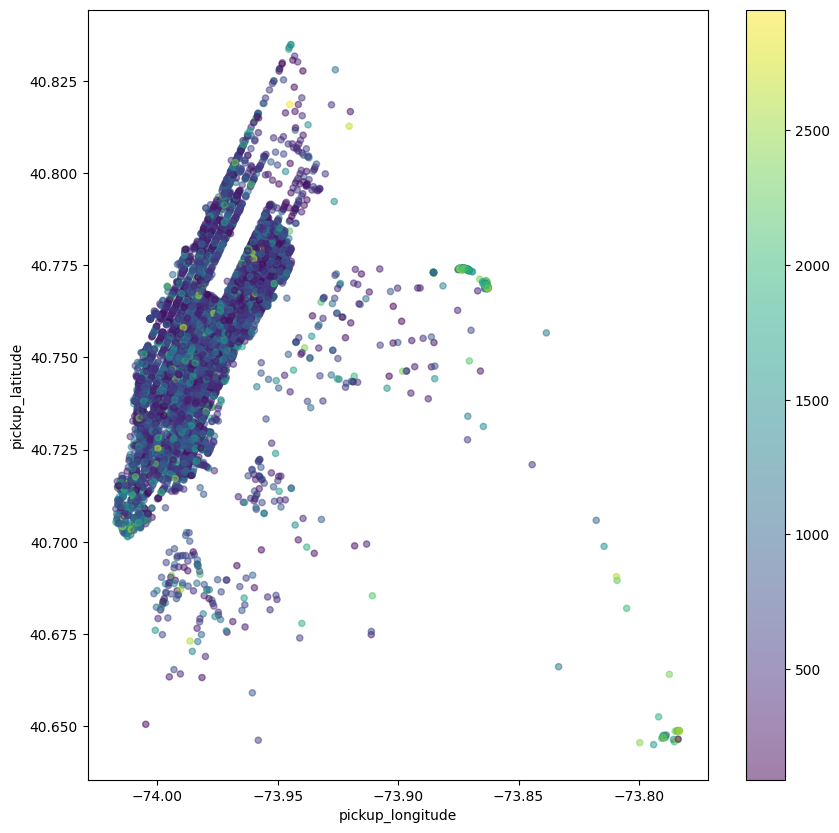

In [8]:
df2_sample = df2.sample(10000)
df2_sample.plot.scatter("pickup_longitude", "pickup_latitude", c=df2_sample.trip_duration, cmap='viridis', alpha=0.5, figsize=(10, 10))


In [9]:
LAT_MULT = 110.574 
LONG_MULT = 84.3567205459

RESOLUTION_LONG = 512
RESOLUTION_LAT = int(RESOLUTION_LONG * LONG_MULT / LAT_MULT)

(RESOLUTION_LONG, RESOLUTION_LAT)


(512, 390)

In [14]:
def visualize_kernel(kernel):
  (yy, xx) = np.meshgrid(np.linspace(-1.5, 1.5, 128), np.linspace(-1, 2, 128))
  grid = np.stack((yy, xx), axis=-1).transpose((1, 0, 2))

  plt.figure()
  plt.imshow(kernel(grid).get(), extent=(-1, 2, -1.5, 1.5), cmap='viridis')
  plt.colorbar()


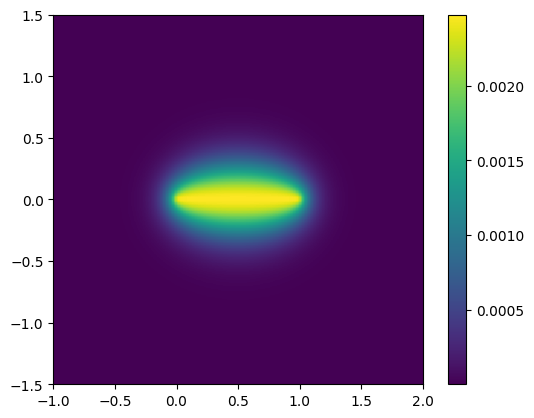

In [15]:
def pi_exp_eclipse(grid, k=6):
  y = grid[:,:,0]
  x = grid[:,:,1]
  a = (x**2 + y**2) ** 0.5
  b = ((1 - x)**2 + y**2) ** 0.5
  return np.exp((-a - b) * k)

visualize_kernel(pi_exp_eclipse)


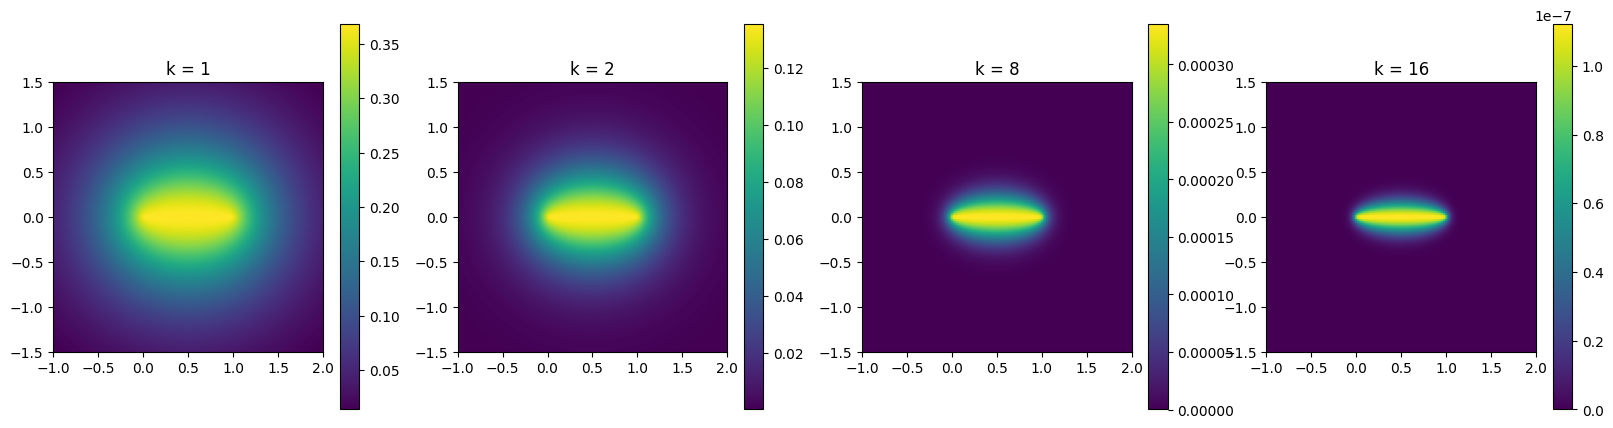

In [18]:
# Visualize pi_exp_eclipse kernel with different k values in the same plot.

def visualize_pi_exp_eclipse_diff_k():
  (yy, xx) = np.meshgrid(np.linspace(-1.5, 1.5, 128), np.linspace(-1, 2, 128))
  grid = np.stack((yy, xx), axis=-1).transpose((1, 0, 2))

  k_values = [1, 2, 8, 16]

  plt.figure(figsize=(20, 5))
  for i in range(len(k_values)):
    plt.subplot(1, len(k_values), i+1)
    plt.imshow(pi_exp_eclipse(grid, k_values[i]).get(), extent=(-1, 2, -1.5, 1.5), cmap='viridis')
    plt.colorbar()
    plt.title('k = {}'.format(k_values[i]))
  plt.show()

visualize_pi_exp_eclipse_diff_k()
    


In [19]:
def lin_trans(grid, p0, p1):
  grid -= p0
  direction = p1 - p0
  dist_sq = np.sum(direction ** 2)
  if dist_sq < 0.01:
    return None
  a = direction[0] / dist_sq
  b = direction[1] / dist_sq

  M = np.array([
    [a, b],
    [-b, a],
  ])

  return np.einsum('ijk,kl->ijl', grid, M)


In [26]:
def generate_heatmap():
  val = np.zeros((RESOLUTION_LAT, RESOLUTION_LONG))
  weight = np.zeros((RESOLUTION_LAT, RESOLUTION_LONG))

  (yy, xx) = np.meshgrid(np.linspace(latitude_min * LAT_MULT, latitude_max * LAT_MULT, RESOLUTION_LAT), np.linspace(longitude_min * LONG_MULT, longitude_max * LONG_MULT, RESOLUTION_LONG))

  for i in range(100_000):
    entry = df2.iloc[i]
    grid = np.stack((yy, xx), axis=-1).transpose((1, 0, 2))

    p0 = np.array([entry.pickup_latitude * LAT_MULT, entry.pickup_longitude * LONG_MULT])
    p1 = np.array([entry.dropoff_latitude * LAT_MULT, entry.dropoff_longitude * LONG_MULT])

    grid = lin_trans(grid, p0, p1)
    if grid is None:
      continue
    w = pi_exp_eclipse(grid)

    distance = np.linalg.norm(p0 - p1)

    # if (distance < 0.01):
    #   continue

    val += w * entry.trip_duration / distance
    weight += w

  final = val / weight
  return final


In [27]:
heatmap = generate_heatmap()


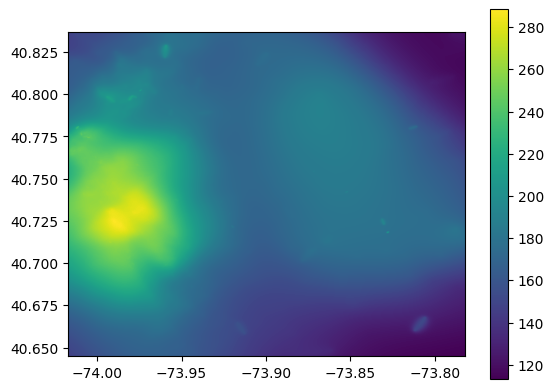

In [28]:
plt.figure()
plt.imshow(heatmap.get(), extent=(longitude_min, longitude_max, latitude_min, latitude_max), cmap='viridis')
plt.colorbar()


In [29]:
from PIL import Image
def create_png(heatmap):
  heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap))
  # Use pure red for the hottest areas
  # Use completely transparent for the coldest areas
  
  array = np.zeros((heatmap.shape[0], heatmap.shape[1], 4), 'uint8')
  array[:,:,0] = 255
  array[:,:,3] = heatmap * 255

  image = Image.fromarray(array.get(), mode='RGBA')
  image.save('heatmap.png')

create_png(heatmap)

import json

json.dump({
  'latitude_min': latitude_min,
  'latitude_max': latitude_max,
  'longitude_min': longitude_min,
  'longitude_max': longitude_max,
}, open('extent.json', 'w'))
